# Individual Assignment_1

- What: Download, manipulate and merge two or more datasets from below
- How: Create functions in a python file to do this
- Show: Show how to use these python files in a notebook

###### I understand that the data I used for Assignment 1 may not be sufficient to fully address the research question's correlation. I’ve done my best given the current stage of my learning, and I’m committed to deepening my understanding through the course. I also apologize for the delay. If you have any additional feedback, I would greatly appreciate it.

## Research Question
Did the Dot-com Bubble (1995–2000) and its Crash (2001–2002) exacerbate the economic recovery of Asian countries already suffering from the Asian Financial Crisis (1997–1998)?
- Sub-question: Were there observable differences in macroeconomic recovery patterns—such as GDP growth, unemployment, and FDI inflows—between Asian economies and advanced economies following the crash of the Dot-com Bubble?

## Method
### Time periods 
- Why 1995-2004?
    - pre-(1995–1996)
    - Asian Financial crisis (1997–1998)
    - dot-com bubble burst (2000–2002)
    - recovery (2003–2004)
### Country Selction
- Treatment Group: Asian countries that experienced both the Asian Financial Crisis and the dot-com bubble
    - Korea, Thailand, Indonesia, Malaysia, Philippines
- Control Group: Non-Asian industrialized countries that experienced the dot-com bubble but not the foreign exchange crisis
    - USA, Canada, UK, Germany, France, Sweden, Finland

### Data Sources
Below indicators are designed to capture responses from various aspects, including the real economy, financial markets, fiscal policy, and labor markets, and enable multifaceted analyses to empirically explore the cumulative impact of two different economic shocks (the Asian financial crisis and the Dot-com bubble burst).
- World Bank API (1995–2004):
    - GDP per capita (current & PPP)
    - GDP growth (annual %)
    - Foreign direct investment, net inflows (% of GDP)
    - External debt (% of GNI)
    - Inflation (CPI)
    - Gov. budget balance (% of GDP)
    - Real effective exchange rate (REER)

- OECD API (1995–2004):
    - Quarterly unemployment rate (UNR)

### Empirical Strategy
#### Approach
- Descriptive Analysis
    - Dividing the period from 1995 to 2004 into the above four periods, visualizing the trend of changes in major economic indicators of each country as a line graph or heat map, etc.
    - Comparing the recovery speed and shock pattern of Asian countries and advanced countries

- Comparative Grouping:
    - Treatment group: Countries that experienced the Asian foreign exchange crisis + dot-com shock (Korea, Thailand, Indonesia, Malaysia, Philippines)
    - Control group: Advanced countries that were mainly affected by the dot-com bubble (USA, Canada, Germany, UK, etc.)

- Using Difference-in-Differences logic (if possible):
    - Define treatment group = Asian countries hit by both crises
    - Control group = Western economies affected primarily by the Dot-com Bubble
    - Measure relative economic deterioration post-2001

#### Regression Model (Difference-in-Differences Style)

$$
Y_{it} = \alpha + \beta_1 \cdot Post2001_t + \beta_2 \cdot CrisisCountry_i + \beta_3 \cdot (Post2001_t \times CrisisCountry_i) + \epsilon_{it}
$$

---

#### Variable Explanation

| **Variable**                                     | **Meaning**                                                                 |
|--------------------------------------------------|------------------------------------------------------------------------------|
| $Y_{it}$                                         | Economic indicator for country $i$ at time $t$ (e.g., GDP growth, unemployment) |
| $\alpha$                                         | Constant term (baseline level)                                               |
| $Post2001_t$                                     | Time dummy variable: 1 if year ≥ 2001, 0 otherwise                           |
| $CrisisCountry_i$                                | 1 if country experienced the Asian Financial Crisis, 0 otherwise             |
| $Post2001_t \times CrisisCountry_i$              | Interaction term (for crisis countries after 2001)                           |
| $\epsilon_{it}$                                  | Error term                                                                   |

---

#### Interpretation of Coefficients

| **Coefficient**   | **Interpretation**                                                                 |
|-------------------|-------------------------------------------------------------------------------------|
| $\beta_1$         | Average change across **all countries** after the Dot-com crash                    |
| $\beta_2$         | Baseline difference for **crisis countries before 2001**                           |
| $\beta_3$         | **Key coefficient** – Additional change for Asian crisis countries **after 2001** compared to developed countries.<br>If significantly negative → Dot-com crash had a **more adverse effect** on Asian economies |


### Main Focus
- Key indicators to observe:
    - GDP growth rate decline post-2001
    - Drop in FDI inflows in crisis countries
    - Unemployment rate trends (resilience vs. vulnerability)
    - Fiscal balance shifts and debt burden trends

- Temporal windows:
    - Recovery patterns from the 1997–1998 Asian Financial Crisis
    - Shock from 2001–2002 Dot-com collapse and whether it "double-hit" Asia

### Goal
To empirically assess whether the crash of the Dot-com Bubble delivered a secondary economic shock that delayed or worsened the post-crisis recovery of Asian economies already weakened by the 1997–1998 financial turmoil. Additionally, to identify the compound impact of sequential global financial shocks on vulnerable economies.


## 1.1 Download data

### World Bank

In [1]:
import requests
import pandas as pd

def download_worldbank(indicator, countries, date_start, date_end):
    url_base = 'http://api.worldbank.org/v2/'  # Base URL for the World Bank API
    country_codes = ';'.join(countries)  # Combine country codes into a string
    url = url_base + f'country/{country_codes}/indicator/{indicator}?date={date_start}:{date_end}&per_page=30000' #create the url with start and end date.

    response = requests.get(url)  # Download data from the URL
    df = pd.read_xml(response.content)  # Convert the downloaded data to a table
    df["indicator_code"] = indicator  # Add a column to distinguish which indicator it is
    return df

In [2]:
# List of indicators to collect
indicators = [
    'NY.GDP.PCAP.CD',        # GDP per capita (current US$)
    'NY.GDP.MKTP.KD.ZG',     # GDP growth (annual %)
    'NY.GDP.PCAP.PP.KD',     # GDP per capita, PPP (constant 2017 international $)
    'BX.KLT.DINV.WD.GD.ZS',  # Foreign direct investment, net inflows (% of GDP)
    'DT.DOD.DECT.GN.ZS',     # External debt stocks (% of GNI)
    'FP.CPI.TOTL.ZG',        # Inflation, consumer prices (annual %)
    'GC.BAL.CASH.GD.ZS',     # Cash surplus/deficit (% of GDP)
    'PX.REX.REER'            # Real effective exchange rate index (2010 = 100)
]

# List of target countries
countries = ['US', 'CA', 'GB', 'DE', 'FR', 'NL', 'FI', 'CH', 'KR', 'TH', 'ID', 'MY', 'PH']

# Create an empty DataFrame to store all the data
all_data = pd.DataFrame()

# Loop over each indicator and collect the data
for indicator in indicators:
    df = download_worldbank(
        indicator=indicator,
        countries=countries,
        date_start='1995',
        date_end='2004'
    )
    all_data = pd.concat([all_data, df], ignore_index=True)

# Display the first 2 rows of the combined result
print(all_data.head(2))

                      indicator country countryiso3code    date         value  \
0  GDP per capita (current US$)  Canada             CAN  2004.0  32145.541262   
1  GDP per capita (current US$)  Canada             CAN  2003.0  28301.864594   

   unit  obs_status  decimal  indicator_code  id  key message  
0   NaN         NaN      1.0  NY.GDP.PCAP.CD NaN  NaN     NaN  
1   NaN         NaN      1.0  NY.GDP.PCAP.CD NaN  NaN     NaN  


### OECD

In [3]:
import requests
import pandas as pd
import io

# OECD Quarterly Unemployment Rate Data
url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_PDB@DF_PDB_ULC_Q,1.0/.Q.......?startPeriod=1995-Q1&endPeriod=2004-Q4&format=csv"

response = requests.get(url)
data = io.StringIO(response.text)
df = pd.read_csv(data)

# Filter for Unemployment Rate (UNR)
if 'SUBJECT' in df.columns:
    df = df[df['SUBJECT'] == 'UNR']
elif 'INDICATOR' in df.columns:
    df = df[df['INDICATOR'] == 'UNR']

# Select relevant columns
cols = ['REF_AREA', 'TIME_PERIOD', 'OBS_VALUE', 'MEASURE']
df_oecd = df[cols].copy()
df_oecd.columns = ['Country', 'Quarter', 'Unemployment_Rate', 'Measure']

# ✅ Filter by country
target_countries = ['USA', 'CAN', 'GBR', 'DEU', 'FRA', 'NLD', 'FIN', 'CHE', 'KOR', 'THA', 'IDN', 'MYS', 'PHL']
df_oecd = df_oecd[df_oecd['Country'].isin(target_countries)]

# Check result
print(df_oecd.head())

    Country  Quarter  Unemployment_Rate Measure
195     NLD  2002-Q1           5.184929    ULCE
196     NLD  2001-Q4           3.389838    ULCE
197     NLD  1998-Q2           0.832500    ULCE
198     NLD  1998-Q1           0.863486    ULCE
199     NLD  1997-Q4           0.726510    ULCE


## 1.2 Manipulate Data

In [4]:
def manipulate_worldbank(df):
    # Keep only necessary columns
    df_clean = df[['countryiso3code', 'date', 'value', 'indicator_code']].copy()
    df_clean.columns = ['Country', 'Year', 'Value', 'Indicator']
    
    # Drop missing values
    df_clean.dropna(inplace=True)
    
    # Convert year to integer
    df_clean['Year'] = df_clean['Year'].astype(int)
    
    return df_clean

def manipulate_oecd(df):
    df_clean = df[['Country', 'Quarter', 'Unemployment_Rate']].copy()
    
    # Convert Quarter to Year (e.g., 1996-Q2 → 1996)
    df_clean['Year'] = df_clean['Quarter'].str.slice(0, 4).astype(int)
    
    # Group by Year and Country (average across quarters)
    df_clean = df_clean.groupby(['Country', 'Year'])['Unemployment_Rate'].mean().reset_index()
    
    return df_clean

## 1.3 Merge Data

In [5]:
def merge_data(worldbank_df, oecd_df):
    # Pivot World Bank data so each indicator is its own column
    wb_pivot = worldbank_df.pivot_table(
        index=['Country', 'Year'],
        columns='Indicator',
        values='Value'
    ).reset_index()

    # Merge with OECD data
    df_merged = pd.merge(wb_pivot, oecd_df, on=['Country', 'Year'], how='left')
    
    return df_merged

In [6]:
# STEP 1: Clean and manipulate the datasets
worldbank_clean = manipulate_worldbank(all_data)
oecd_clean = manipulate_oecd(df_oecd)

# STEP 2: Merge the two datasets
final_df = merge_data(worldbank_clean, oecd_clean)

# code to convert country codes to names
iso3_to_country = {
    'USA': 'United States', 'CAN': 'Canada', 'GBR': 'United Kingdom', 'DEU': 'Germany',
    'FRA': 'France', 'NLD': 'Netherlands', 'FIN': 'Finland', 'CHE': 'Switzerland',
    'KOR': 'South Korea', 'THA': 'Thailand', 'IDN': 'Indonesia', 'MYS': 'Malaysia', 'PHL': 'Philippines'
}

# Convert ISO3 country codes to full country names
indicator_labels = {
    'NY.GDP.PCAP.CD':        'GDP per capita (current US$)',
    'NY.GDP.MKTP.KD.ZG':     'GDP growth (annual %)',
    'NY.GDP.PCAP.PP.KD':     'GDP per capita, PPP (constant 2017 intl $)',
    'BX.KLT.DINV.WD.GD.ZS':  'FDI inflows (% of GDP)',
    'DT.DOD.DECT.GN.ZS':     'External debt (% of GNI)',
    'FP.CPI.TOTL.ZG':        'Inflation (CPI, annual %)',
    'GC.BAL.CASH.GD.ZS':     'Gov. budget balance (% of GDP)',
    'PX.REX.REER':           'REER index (2010=100)'
}

final_df['Country'] = final_df['Country'].map(iso3_to_country)
final_df.rename(columns=indicator_labels, inplace=True)

print(final_df.head())


  Country  Year  FDI inflows (% of GDP)  External debt (% of GNI)  \
0  Canada  1995                2.253873                       NaN   
1  Canada  1996                1.398282                       NaN   
2  Canada  1997                2.317970                       NaN   
3  Canada  1998                3.939938                       NaN   
4  Canada  1999                4.047104                       NaN   

   Inflation (CPI, annual %)  GDP growth (annual %)  \
0                   2.148760               2.682328   
1                   1.570531               1.688961   
2                   1.621216               4.280167   
3                   0.995942               3.892887   
4                   1.734843               5.141003   

   GDP per capita (current US$)  GDP per capita, PPP (constant 2017 intl $)  \
0                  20679.634793                                41571.329473   
1                  21296.972354                                41833.865249   
2                

## 2. Visulaization

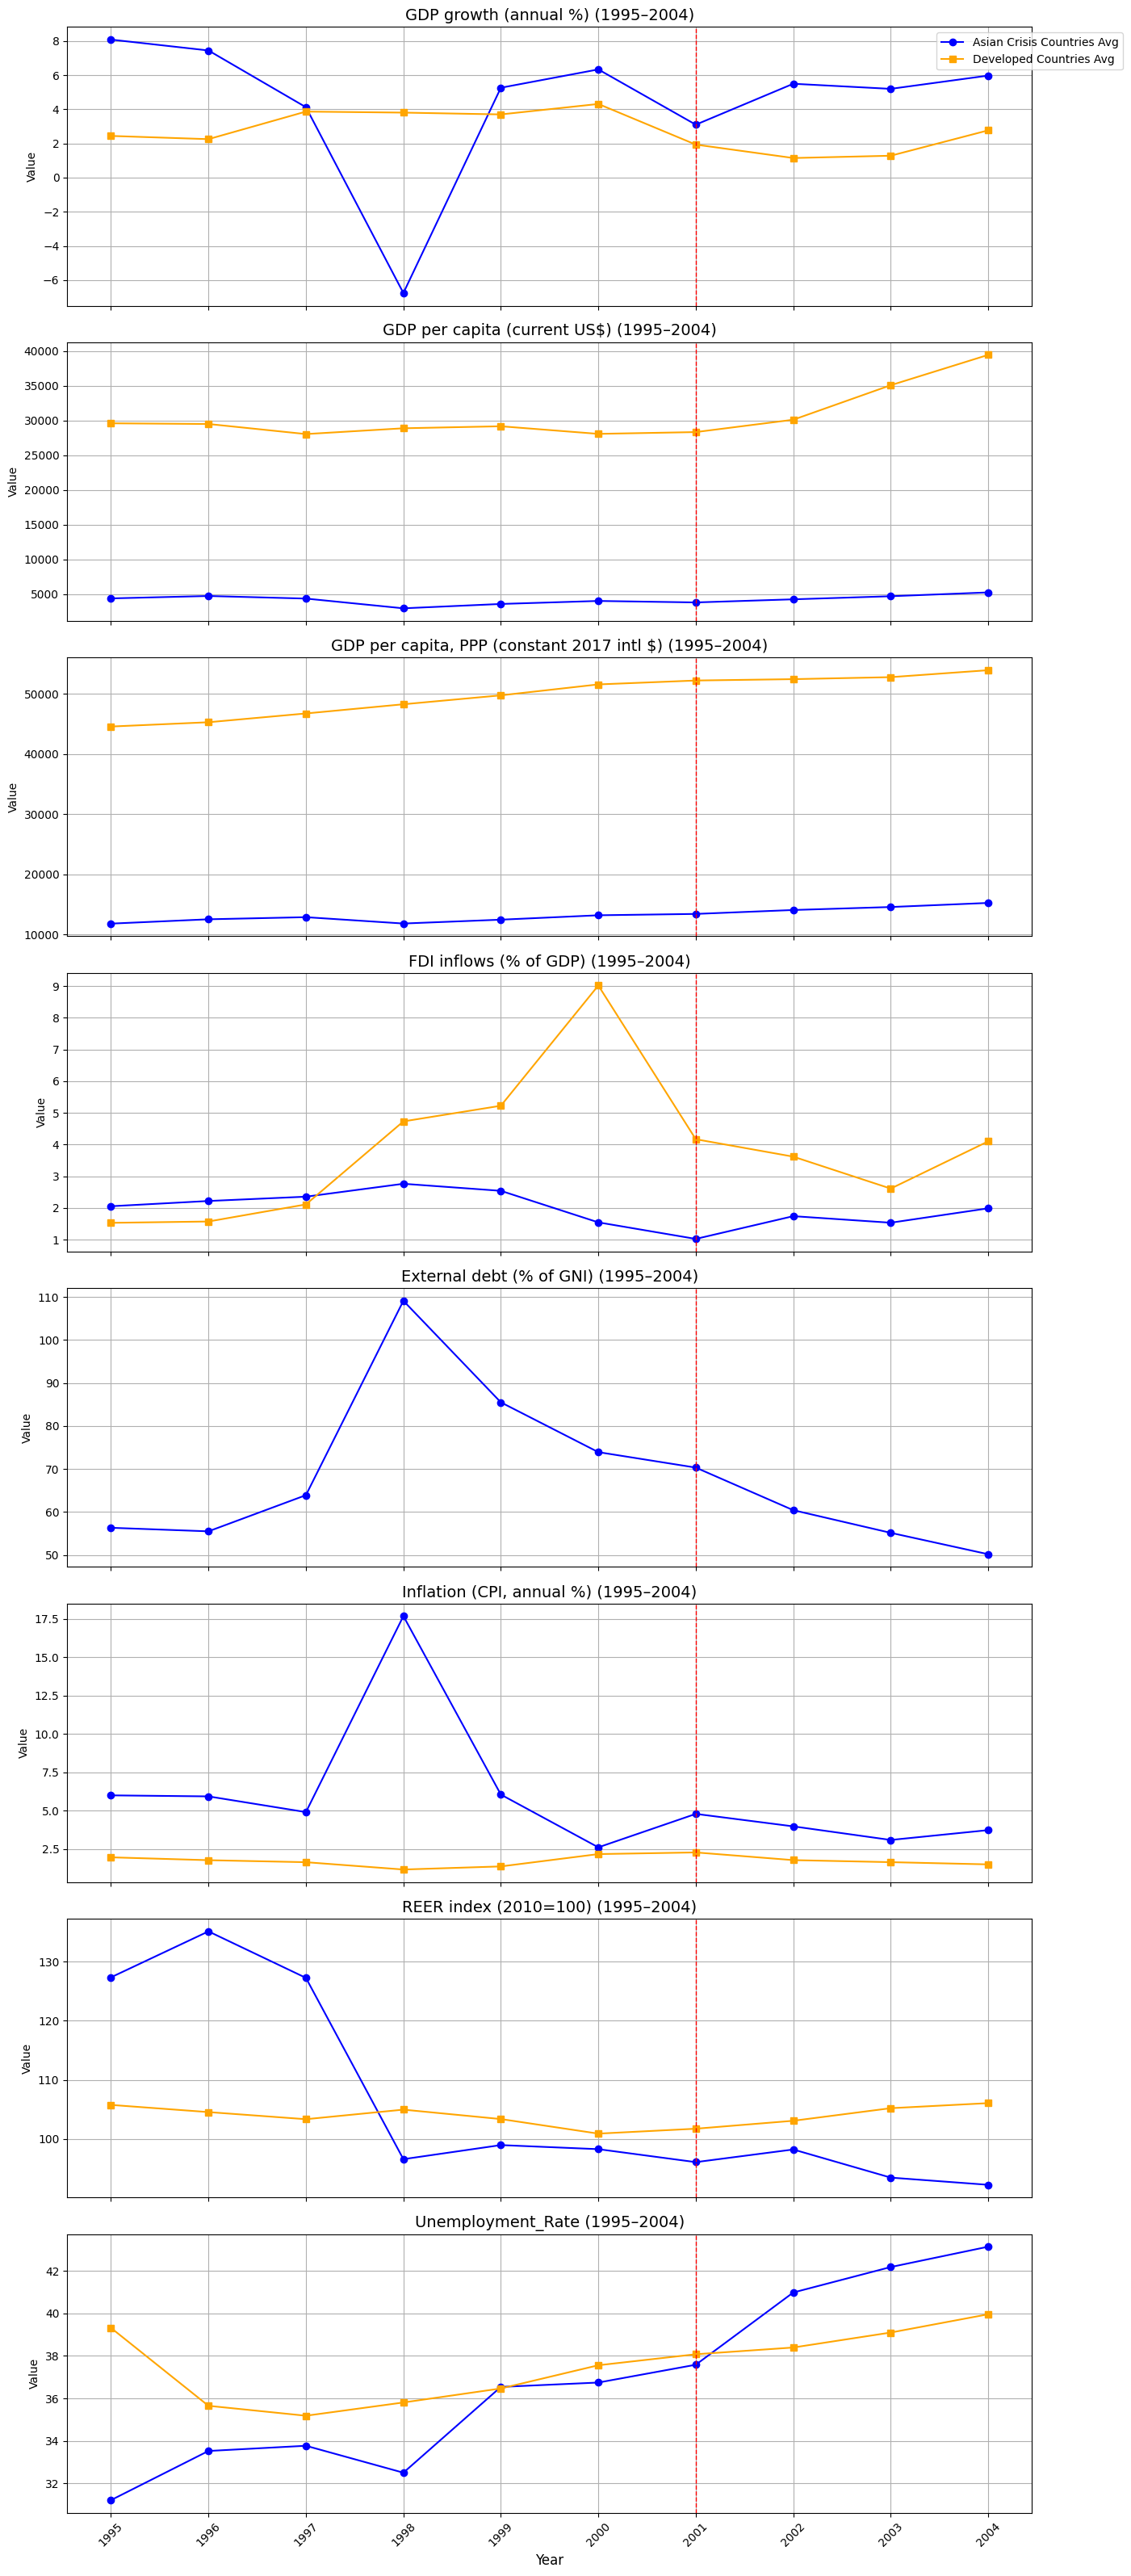

In [7]:
import matplotlib.pyplot as plt

# Define groups
crisis_countries = ['South Korea', 'Thailand', 'Indonesia', 'Malaysia', 'Philippines']
developed_countries = ['United States', 'Germany', 'United Kingdom', 'France', 'Canada', 'Netherlands', 'Switzerland', 'Finland']

# List of indicators
indicators = [
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'GDP per capita, PPP (constant 2017 intl $)',
    'FDI inflows (% of GDP)',
    'External debt (% of GNI)',
    'Inflation (CPI, annual %)',
    'Gov. budget balance (% of GDP)',
    'REER index (2010=100)',
    'Unemployment_Rate'
]

# Use only indicators that actually exist in the dataset
available_indicators = [col for col in indicators if col in final_df.columns]

# Set year range
years = list(range(1995, 2005))  # 1995 to 2004

# Set up subplots
fig, axes = plt.subplots(len(available_indicators), 1, figsize=(14, 4 * len(available_indicators)), sharex=True)

# Loop through each indicator
for i, indicator in enumerate(available_indicators):
    ax = axes[i]

    # Calculate group averages
    crisis_avg = final_df[final_df['Country'].isin(crisis_countries)].groupby('Year')[indicator].mean()
    dev_avg = final_df[final_df['Country'].isin(developed_countries)].groupby('Year')[indicator].mean()

    # Filter by selected years
    crisis_avg = crisis_avg.loc[crisis_avg.index.isin(years)].sort_index()
    dev_avg = dev_avg.loc[dev_avg.index.isin(years)].sort_index()

    # Plot
    ax.plot(crisis_avg.index, crisis_avg.values, label='Asian Crisis Countries Avg', marker='o', color='blue')
    ax.plot(dev_avg.index, dev_avg.values, label='Developed Countries Avg', marker='s', color='orange')
    ax.axvline(x=2001, color='red', linestyle='--', linewidth=1)

    ax.set_title(f"{indicator} (1995–2004)", fontsize=14)
    ax.set_ylabel("Value")
    ax.set_xticks(years)  # 🎯 Explicitly set year ticks
    ax.set_xticklabels(years, rotation=45)  # Rotate year labels
    ax.grid(True)

# Set x-axis label, legend, and adjust layout
axes[-1].set_xlabel("Year", fontsize=12)
axes[0].legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.show()


## 3. Regression

In [8]:
import statsmodels.formula.api as smf

# Create dummy variables if not already created
final_df['Post2001'] = final_df['Year'].astype(int) >= 2001
final_df['Post2001'] = final_df['Post2001'].astype(int)

asian_crisis_countries = ['South Korea', 'Thailand', 'Indonesia', 'Malaysia', 'Philippines']
final_df['CrisisCountry'] = final_df['Country'].isin(asian_crisis_countries).astype(int)

# List of dependent variables to test
dependent_vars = [
    'GDP growth (annual %)',
    'GDP per capita (current US$)',
    'GDP per capita, PPP (constant 2017 intl $)',
    'FDI inflows (% of GDP)',
    'External debt (% of GNI)',
    'Inflation (CPI, annual %)',
    'Gov. budget balance (% of GDP)',
    'REER index (2010=100)',
    'Unemployment_Rate'
]

# Run regressions and print results
for var in dependent_vars:
    if var in final_df.columns:
        temp_df = final_df.dropna(subset=[var])
        model = smf.ols(
            formula=f'Q("{var}") ~ Post2001 + CrisisCountry + Post2001:CrisisCountry',
            data=temp_df
        ).fit()
        print(f'\n=== Regression Result for: {var} ===')
        print(model.summary())



=== Regression Result for: GDP growth (annual %) ===
                                OLS Regression Results                                
Dep. Variable:     Q("GDP growth (annual %)")   R-squared:                       0.107
Model:                                    OLS   Adj. R-squared:                  0.086
Method:                         Least Squares   F-statistic:                     5.047
Date:                        Fri, 09 May 2025   Prob (F-statistic):            0.00246
Time:                                20:48:53   Log-Likelihood:                -329.34
No. Observations:                         130   AIC:                             666.7
Df Residuals:                             126   BIC:                             678.1
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.0

### Summary of Findings from the Regression Results

### Coefficient Interpretations

- **Post2001 × CrisisCountry (Effect on Asian Crisis Countries after Dot-com Crash)**

  - **GDP growth (annual %)**  
    - Coefficient = 2.4732, p-value = 0.032 → Statistically significant at the 5% level  
    - GDP growth in Asian crisis countries significantly outperformed developed countries after the Dot-com crash

  - **GDP per capita (current US$)**  
    - Coefficient = -3867.69, p-value = 0.098 → Marginally significant at the 10% level  
    - Suggests that income recovery was slower in Asian crisis countries compared to developed countries

  - **GDP per capita, PPP (constant 2017 intl $)**  
    - Coefficient = -3270.60, p-value = 0.238 → Not statistically significant  
    - No clear effect on real purchasing-power-adjusted income recovery

  - **FDI inflows (% of GDP)**  
    - Coefficient = -0.2681, p-value = 0.815 → Highly insignificant  
    - No detectable difference in foreign investment patterns after the crash

  - **External debt (% of GNI)**  
    - Coefficient = -7.5153, p-value = 0.114 → Not significant at the 10% level  
    - Possible downward trend in external debt, but inconclusive

  - **Inflation (CPI, annual %)**  
    - Coefficient = -3.4220, p-value = 0.074 → Statistically significant at the 10% level  
    - Inflation was more stable in Asian countries after the Dot-com crash

  - **REER index (2010=100)**  
    - Coefficient = -19.1245, p-value = 0.004 → Statistically significant at the 1% level  
    - Indicates substantial real exchange rate depreciation, likely for export competitiveness

  - **Unemployment Rate**  
    - Coefficient = 4.7030, p-value = 0.372 → Not statistically significant  
    - No clear evidence of employment disruption from the Dot-com crash in Asian countries

---

### Model Fit and Interpretation Cautions

- R-squared values are moderate across models, indicating varying levels of explanatory power.
- Some models exhibit non-normal residuals (e.g., skewness, kurtosis), so interpretation should be cautious.
- Potential multicollinearity may be present in models involving GDP per capita or REER.

---

### Summary in Brief

- GDP growth and REER indicate that Asian crisis countries recovered faster or adjusted more actively after the Dot-com crash
- Negative shocks were observed in income levels and inflation stability
- No statistically significant effects were found in FDI or unemployment
- Overall, while Asian crisis countries demonstrated growth resilience under dual shocks, structural limitations and asset-based income recovery may have remained constrained